# *Exploratory Data Analysis with Ames Housing Dataset*


---
> Emiliano Quintino Arriola:
> * linkedin.com/in/emiliano-quintino/
> * quintino2022@gmail.com

---

![](img/ames_Cover.jpg)


## About the Data Set

The Ames Housing dataset is a great alternative to the popular but older Boston Housing dataset, it contains 74 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa with the goal of predicting the selling price.

## Importing the Data Set

We are going to start by loading the dataset and transforming it into a pickle file to work with it in a better way.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import scipy


pd.options.display.max_columns = 100
pd.options.display.max_rows = 50
warnings.filterwarnings('ignore')


df = pd.read_csv('Data/train.csv')
df.to_pickle('Data/ames_train.pkl')
train_data = pd.read_pickle('Data/ames_train.pkl')

Before starting with visualizations, let's check the data types of the features and some descriptive statistics.

In [75]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
display(train_data.describe())
num_cols = train_data.describe().columns.to_list()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
train_data[num_cols] = train_data[num_cols].apply(pd.to_numeric, errors= 'coerce') 

## Missing Values

Now, we need to address the missing values in the dataset. First, let's see which variables require this treatment.

In [79]:
import utl
missing_data_report = utl.show_missing(train_data).sort_values(by='pc_missing', ascending=False)
missing_data_report.head(22)

,variable,dtype,count,unique,missing,pc_missing
72,PoolQC,object,1460,4,1453,99.52
74,MiscFeature,object,1460,5,1406,96.30
6,Alley,object,1460,3,1369,93.77
73,Fence,object,1460,5,1179,80.75
25,MasVnrType,object,1460,4,872,59.73
57,FireplaceQu,object,1460,6,690,47.26
3,LotFrontage,float64,1460,111,259,17.74
59,GarageYrBlt,float64,1460,98,81,5.55
64,GarageCond,object,1460,6,81,5.55
58,GarageType,object,1460,7,81,5.55


Using the data description, it is possible to handle the majority of the missing values for several variables.

In [80]:
missing_values_replacement = {
    'PoolQC': 'No_pool',
    'MiscFeature': 'none',
    'Alley': 'No_alley_access',
    'Fence': 'No_Fence',
    'MasVnrType': 'none',
    'FireplaceQu': 'No_Fireplace',
    'GarageFinish': 'No_Garage',
    'GarageYrBlt': 0,
    'GarageQual': 'No_Garage',
    'GarageCond': 'No_Garage',
    'GarageType': 'No_Garage',
    'BsmtExposure': 'No_Basement',
    'BsmtFinType1': 'No_Basement',
    'BsmtFinType2': 'No_Basement',
    'BsmtQual': 'No_Basement',
    'BsmtCond': 'No_Basement'
}

for variable, replacement_value in missing_values_replacement.items():
    train_data[variable] = train_data[variable].fillna(replacement_value)

In [81]:
missing_data_report = utl.show_missing(train_data).sort_values(by='pc_missing', ascending=False)
missing_data_report.head(5)

,variable,dtype,count,unique,missing,pc_missing
3,LotFrontage,float64,1460,111,259,17.74
26,MasVnrArea,float64,1460,328,8,0.55
42,Electrical,object,1460,6,1,0.07
52,KitchenAbvGr,int64,1460,4,0,0.00
59,GarageYrBlt,float64,1460,98,0,0.00


For the feature "Electrical," the dataset has just one missing value. So, it is more convenient to simply drop it.

In [82]:
train_data = train_data.dropna(subset=['Electrical'], axis=0)
missing_data_report = utl.show_missing(train_data).sort_values(by='pc_missing', ascending=False)
missing_data_report.loc[missing_data_report['variable'] == 'Electrical']

,variable,dtype,count,unique,missing,pc_missing
42,Electrical,object,1459,5,0,0.0


For the variables "LotFrontage" and "MasVnrArea", let's compare different imputation methods: mean, mode and KNN

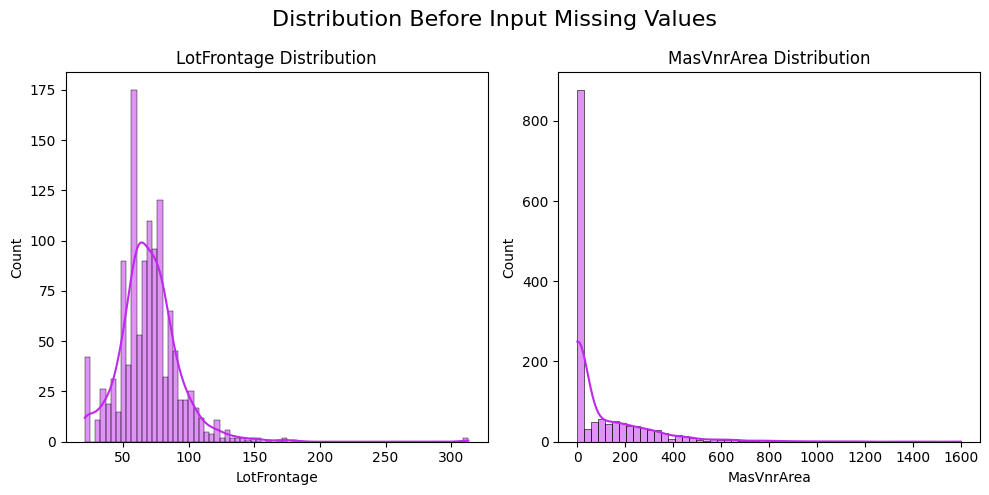

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(train_data['LotFrontage'], ax = axes[0], kde=True, color='#be29ec')
axes[0].set_title('LotFrontage Distribution')
sns.histplot(train_data["MasVnrArea"], ax = axes[1], kde = True, color='#be29ec')
axes[1].set_title('MasVnrArea Distribution')
plt.suptitle('Distribution Before Input Missing Values', fontsize=16)
plt.tight_layout()
plt.show()


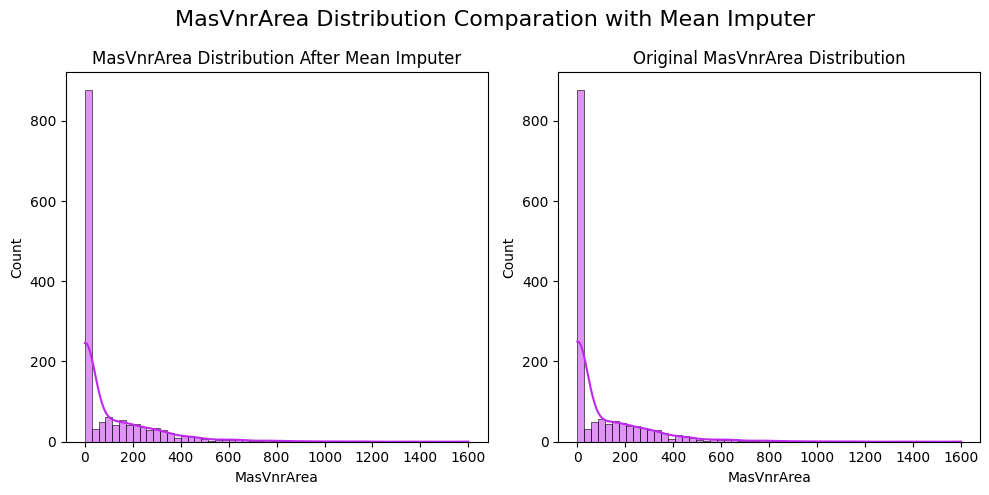

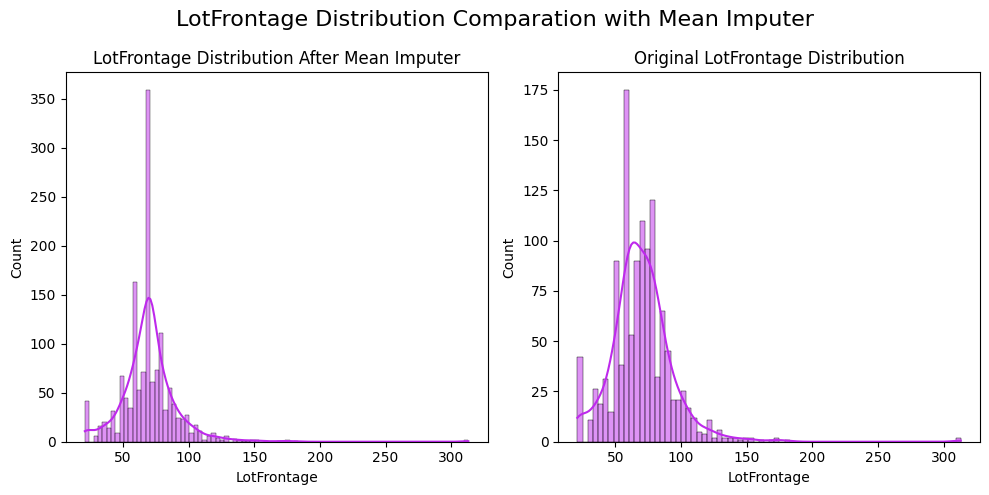

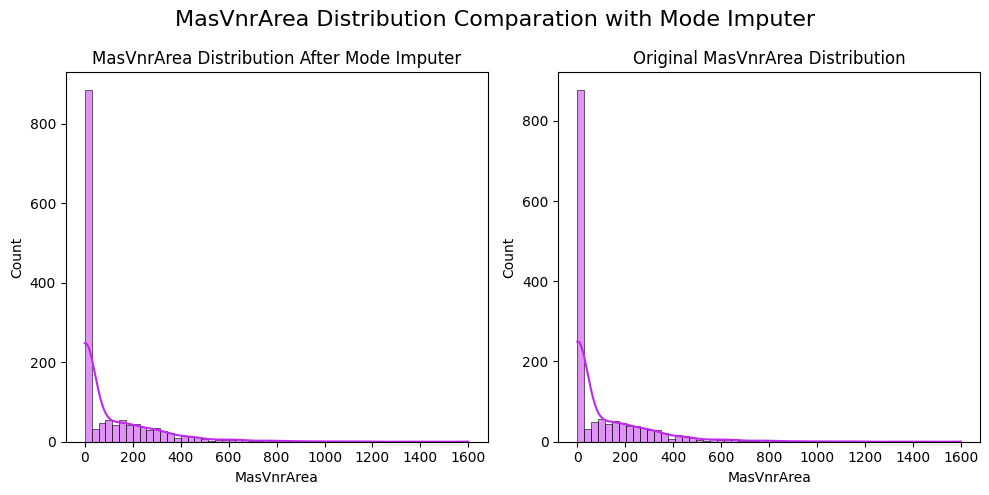

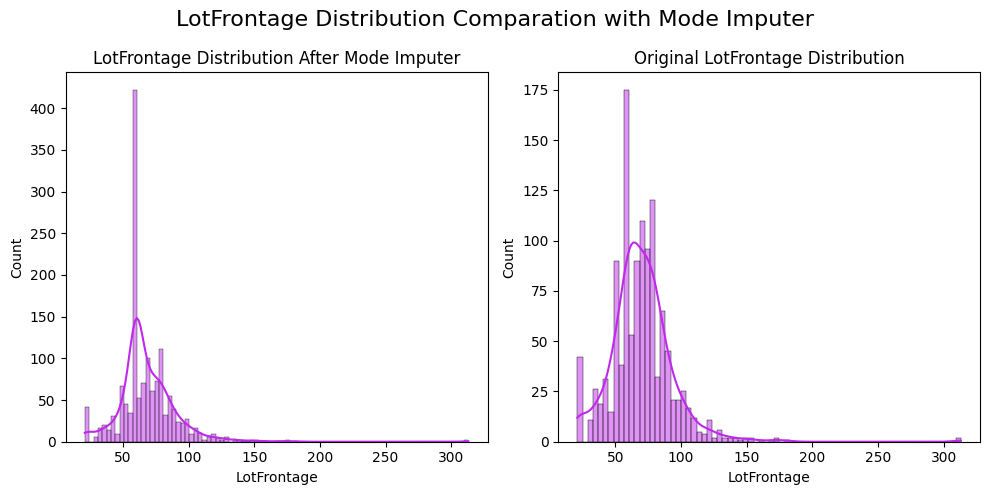

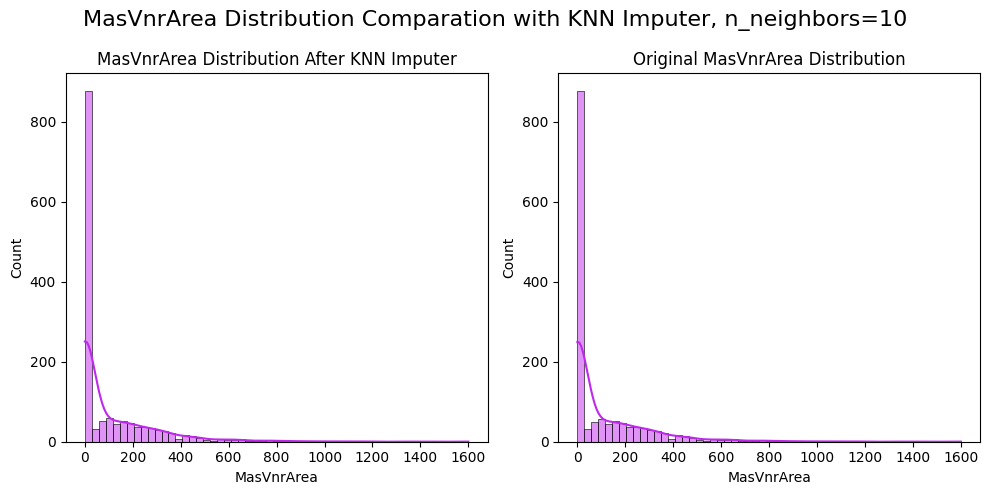

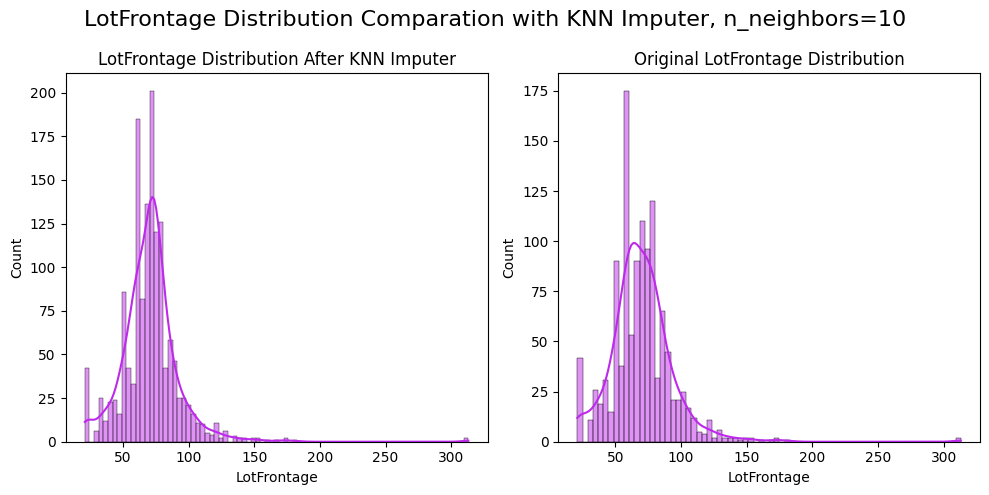

In [84]:
utl.compare_imputation_methods(train_data, ['MasVnrArea', 'LotFrontage'], 'mean')
utl.compare_imputation_methods(train_data, ['MasVnrArea', 'LotFrontage'], 'mode')
utl.compare_imputation_methods(train_data, ['MasVnrArea', 'LotFrontage'], 'knn')

It seems that the more convenient method is KNN. So, let's apply the transformation to the data.

In [85]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
train_data[['MasVnrArea', 'LotFrontage']] = imputer.fit_transform(train_data[['MasVnrArea', 'LotFrontage']])

In [86]:
missing_data_report = utl.show_missing(train_data).sort_values(by='pc_missing', ascending=False)
missing_data_report.head(5)

,variable,dtype,count,unique,missing,pc_missing
0,Id,int64,1459,1459,0,0.0
41,CentralAir,object,1459,2,0,0.0
59,GarageYrBlt,float64,1459,98,0,0.0
58,GarageType,object,1459,7,0,0.0
57,FireplaceQu,object,1459,6,0,0.0


## Target Variable

Our objetive is to predict the SalePrice feature, so lets start by obser the distribution of the variable 

<Axes: xlabel='SalePrice', ylabel='Count'>

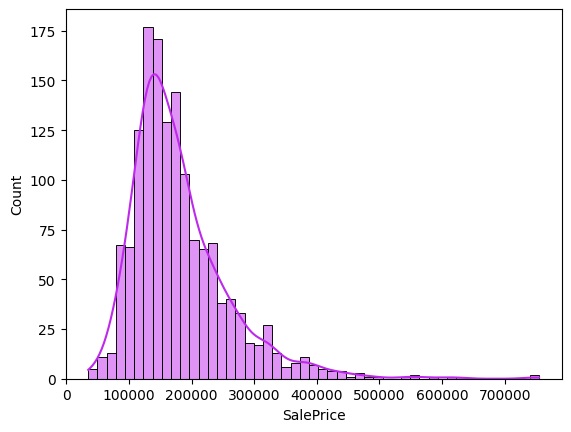

In [87]:
sns.histplot(train_data['SalePrice'], kde=True, color = '#be29ec')

We can see a unimodal distribution but with a heavy tail. So, probably, we will need to apply some kind of transformation like log or standardization.

The next step is to see which variables are more correlated with our objective variable.

<Axes: xlabel='Correlation', ylabel='Feature'>

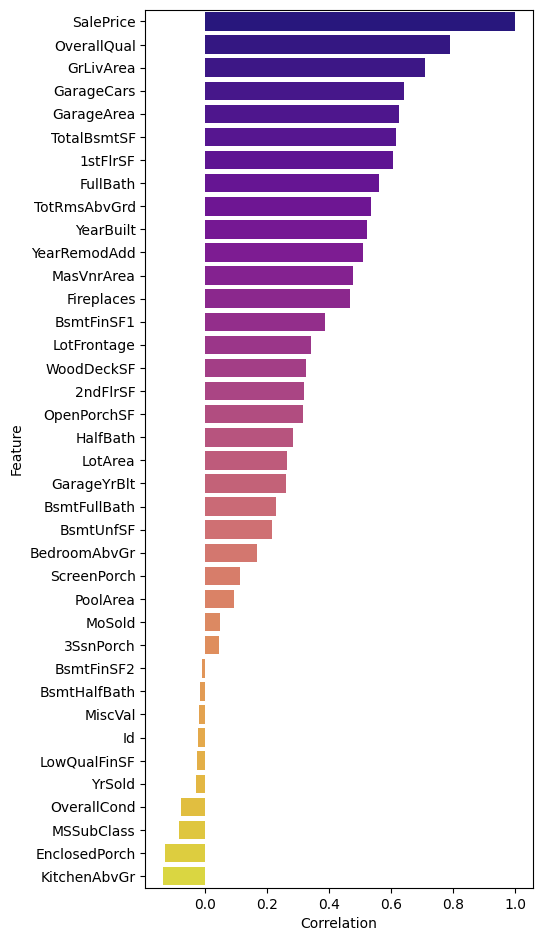

In [88]:
num_variables = train_data.select_dtypes(include=np.number).columns.tolist()

corr_SalePrice = pd.DataFrame()
corr_SalePrice['Feature'] = num_variables
corr_SalePrice['Correlation'] = [train_data[f].corr(train_data['SalePrice']) for f in num_variables]
corr_SalePrice = corr_SalePrice.sort_values('Correlation', ascending=False)

plt.figure(figsize=(5, 0.3*len(num_variables)))
sns.barplot(data=corr_SalePrice, x='Correlation', y='Feature', palette = "plasma",)


Let's create visualizations of scatter plots with the most correlated variables.

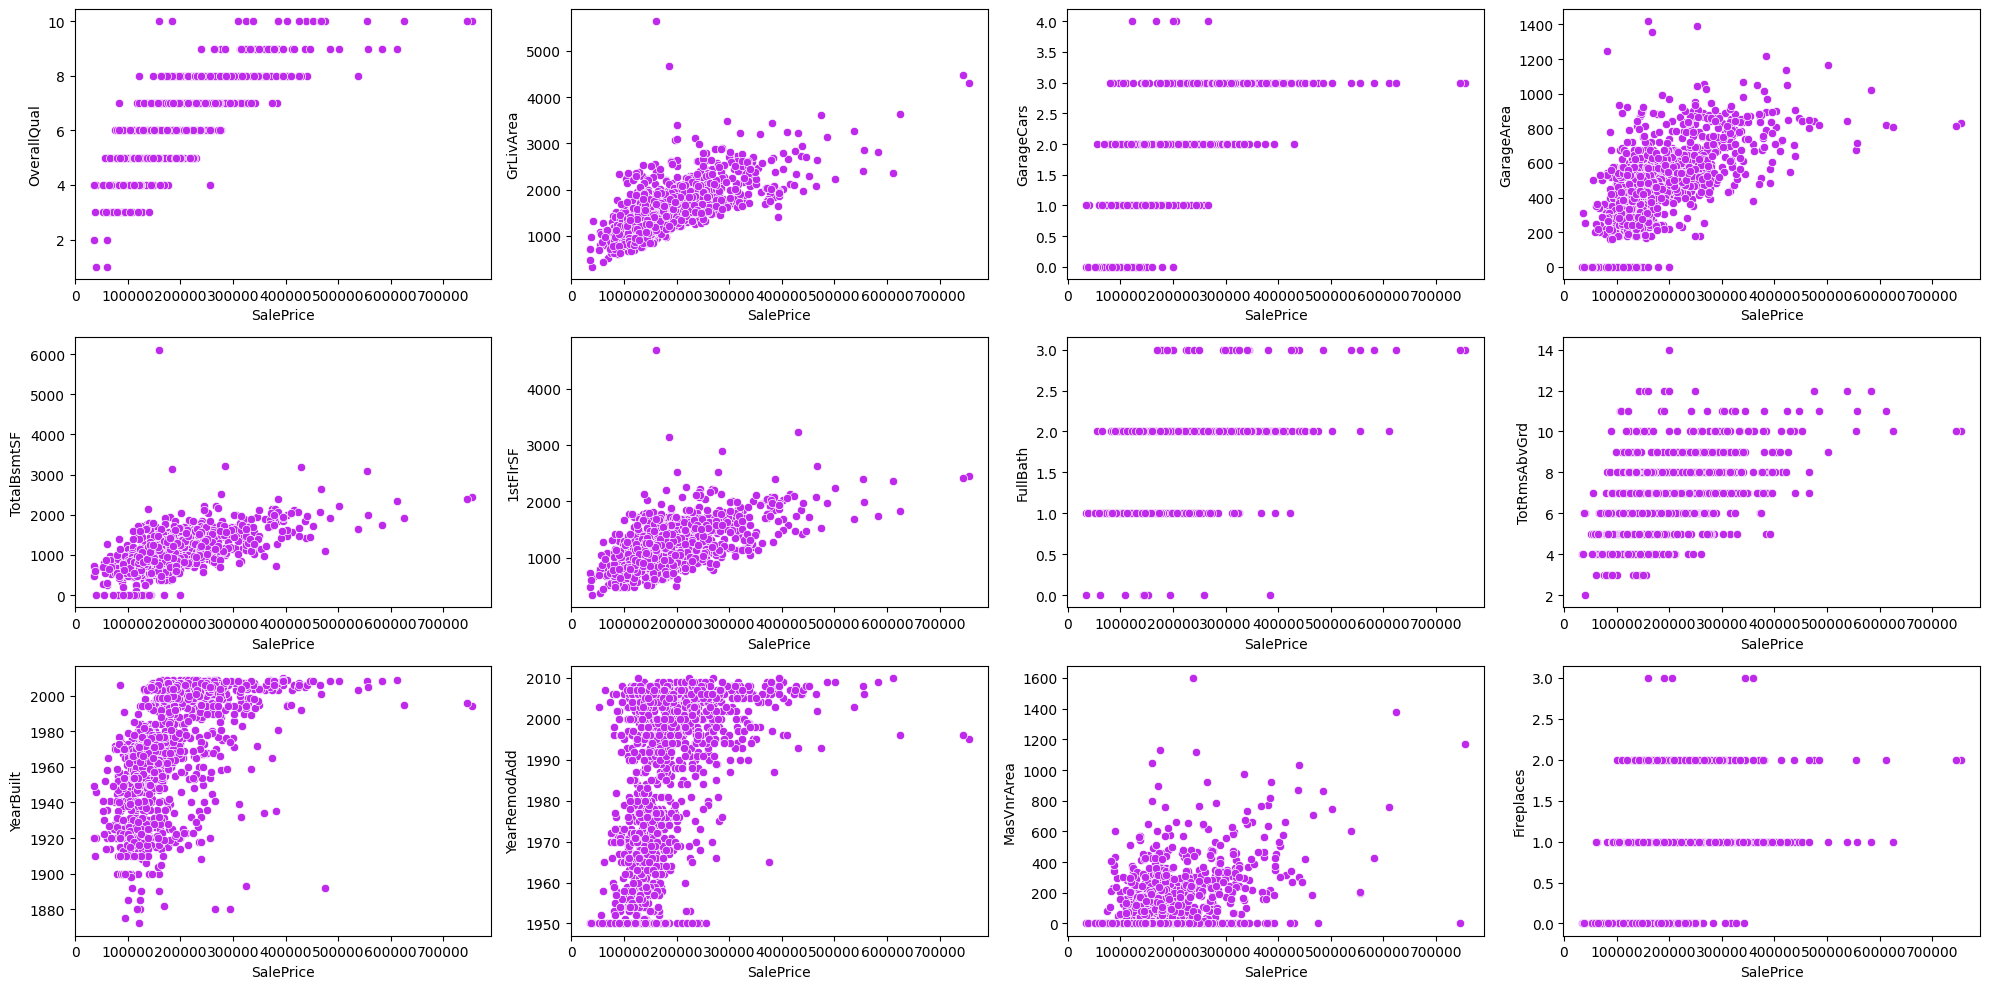

In [89]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize =(20,10))
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'OverallQual', ax = axes[0,0])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'GrLivArea', ax = axes[0,1])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'GarageCars', ax = axes[0,2])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'GarageArea', ax = axes[0,3])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'TotalBsmtSF', ax = axes[1,0])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = '1stFlrSF', ax = axes[1,1])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'FullBath', ax = axes[1,2])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'TotRmsAbvGrd', ax = axes[1,3])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'YearBuilt', ax = axes[2,0])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'YearRemodAdd', ax = axes[2,1])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'MasVnrArea', ax = axes[2,2])
sns.scatterplot(color = "#be29ec", data = train_data, x = 'SalePrice', y = 'Fireplaces', ax = axes[2,3])
plt.tight_layout()


We can use ANOVA to obtain a similar score for categorical variables.

In [90]:
categorical_variables = train_data.select_dtypes(include='object').columns.tolist()

anv = pd.DataFrame()
anv['feature'] = categorical_variables
pvals = []
for c in categorical_variables:
    samples = []
    for cls in train_data[c].unique():
        s = train_data[train_data[c] == cls]['SalePrice'].values
        samples.append(s)
    pval = scipy.stats.f_oneway(*samples)[1]
    pvals.append(pval)
anv['pval'] = pvals

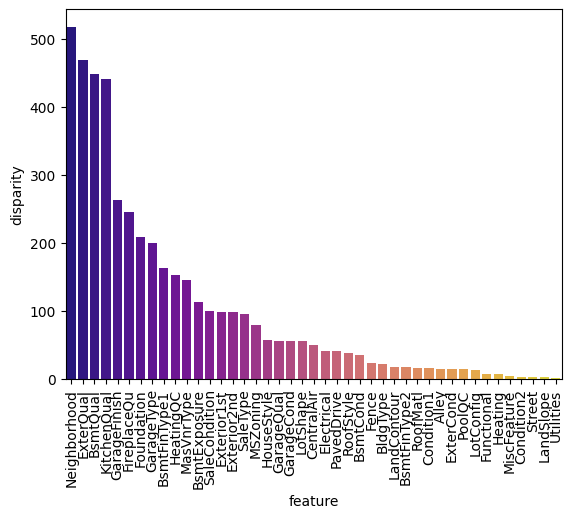

In [91]:
anv['disparity'] = np.log(1./anv['pval'].values)
anv = anv.sort_values('disparity', ascending=False)
sns.barplot(data=anv[anv.disparity>=0.5], x='feature', y='disparity', palette= 'plasma')
x=plt.xticks(rotation=90)

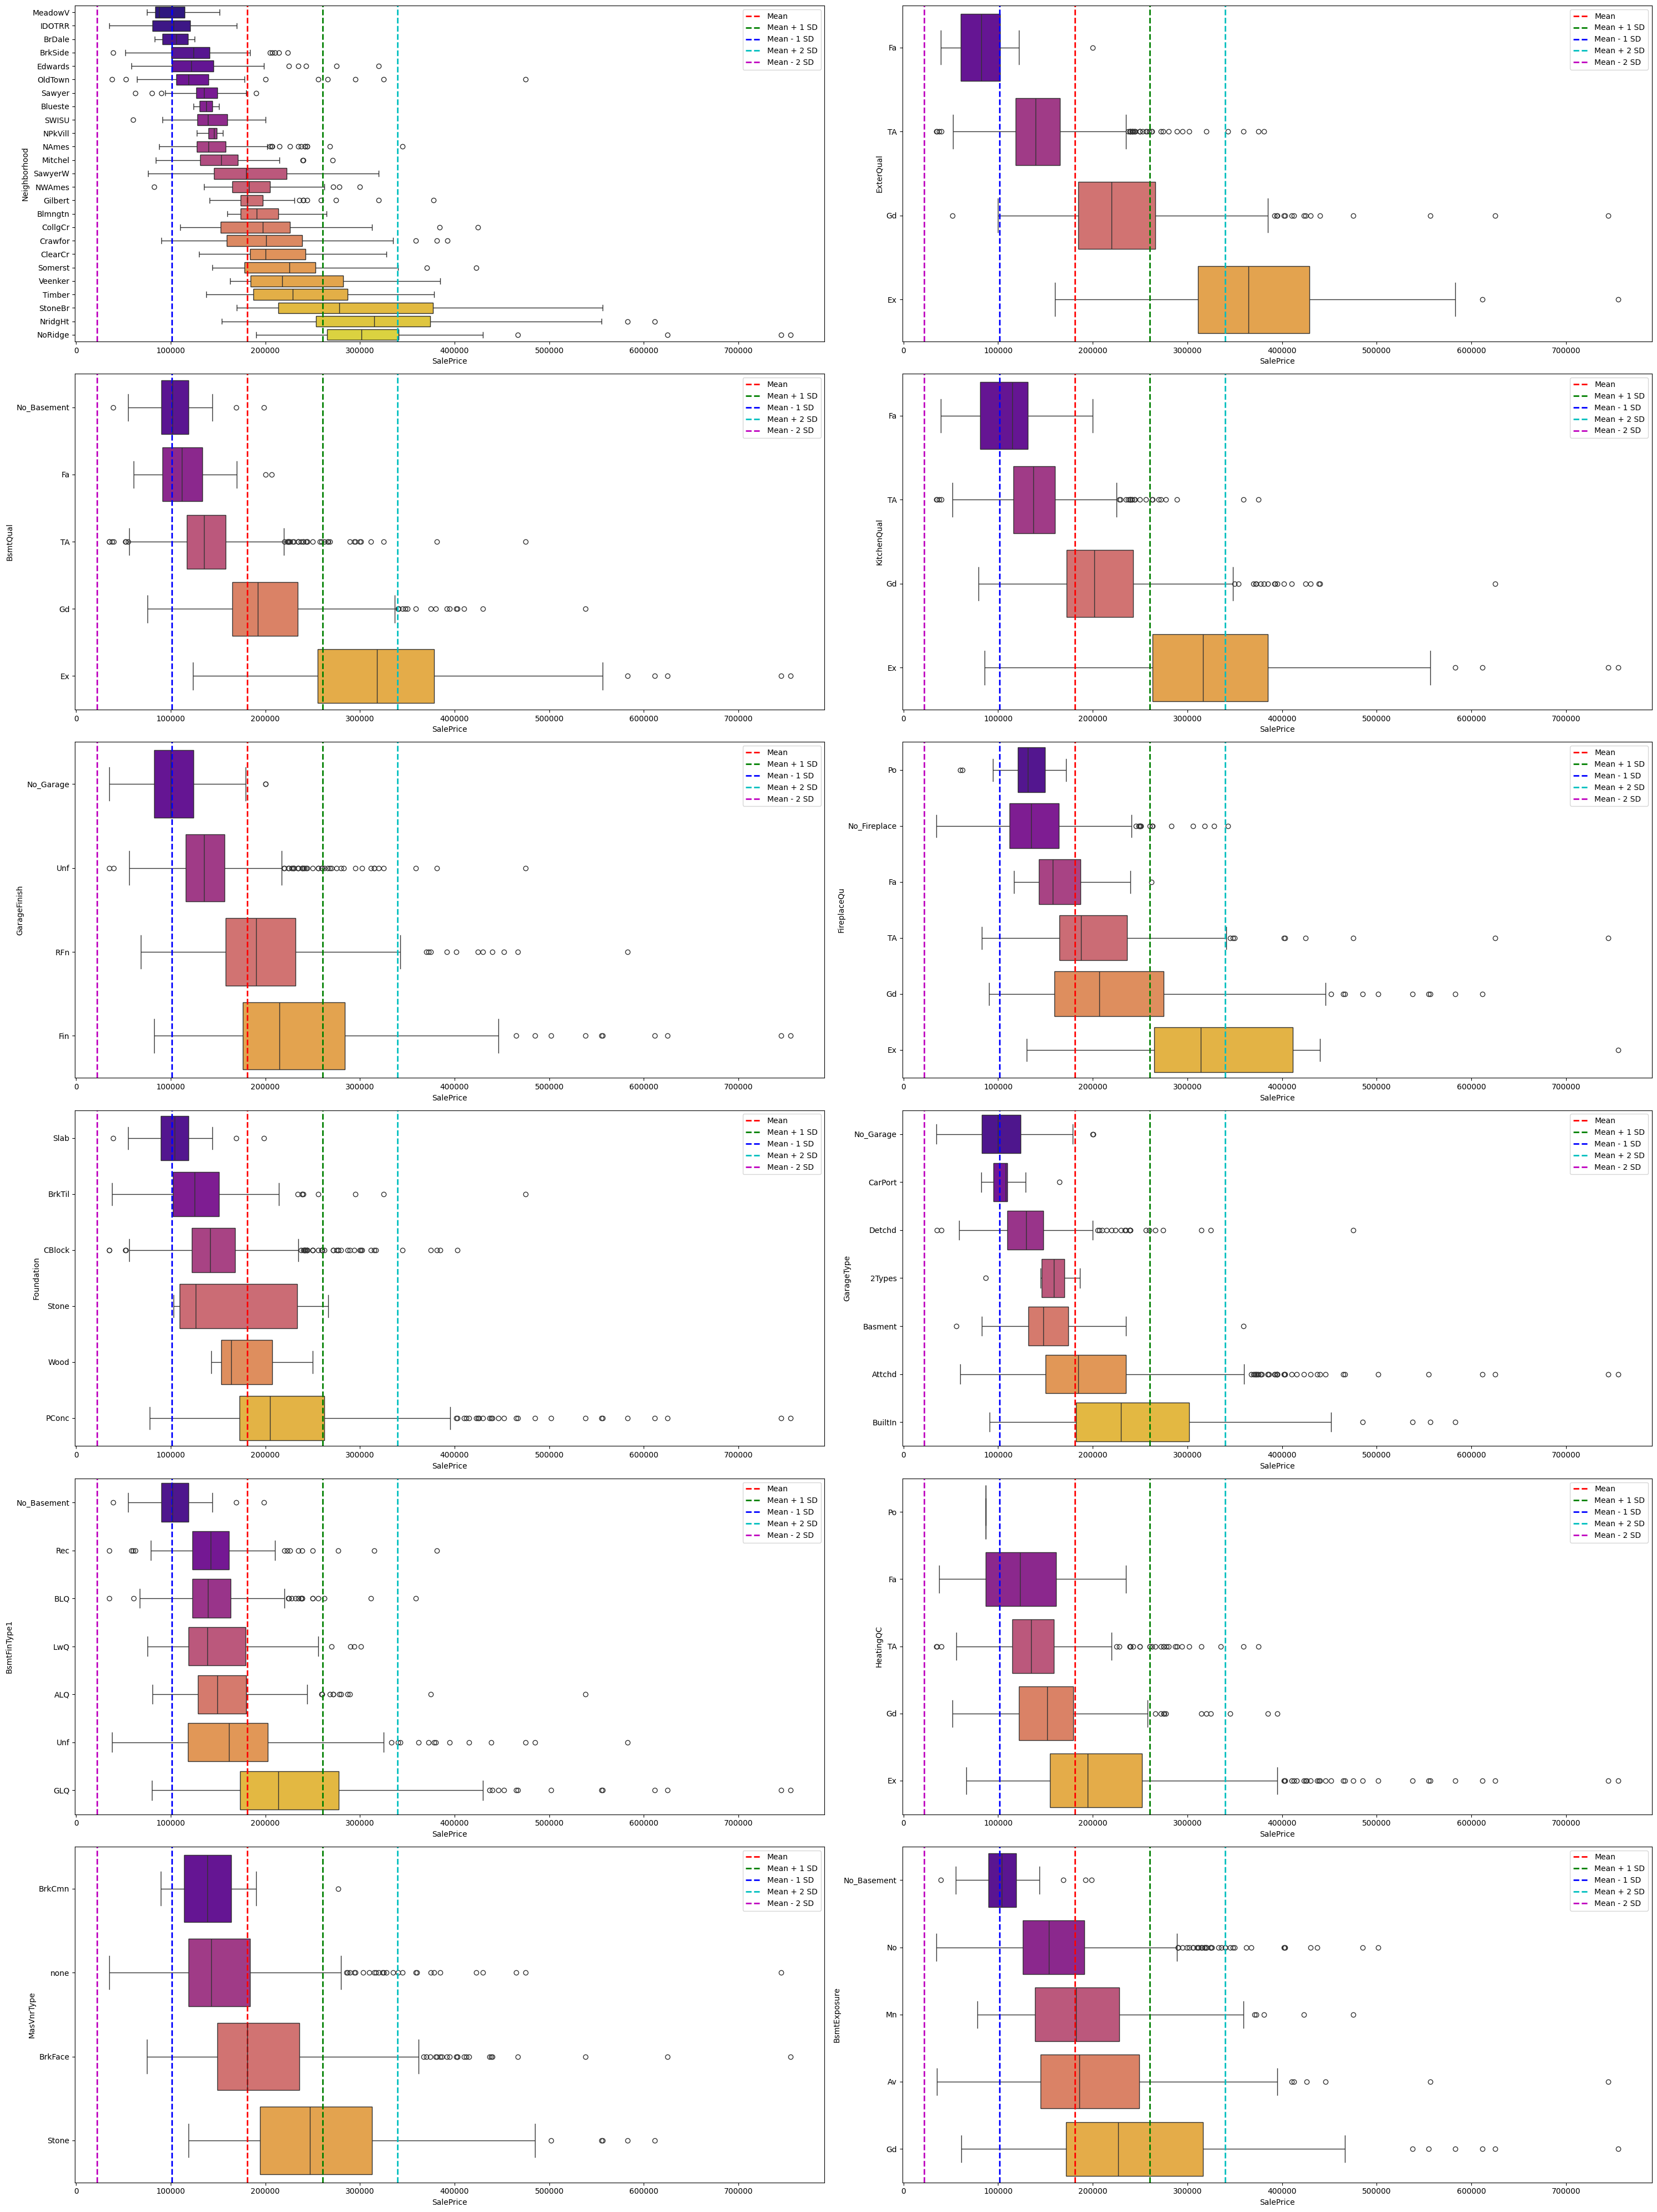

In [92]:
important_cat_variables = ['Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType','BsmtFinType1', 'HeatingQC', 'MasVnrType', 'BsmtExposure']

num_rows = 6
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))

axes = axes.ravel()
ames_copy = train_data.copy(deep=True)

for i, c in enumerate(important_cat_variables):
    group_means = train_data.groupby(c)['SalePrice'].mean().sort_values()
    ames_copy[c] = ames_copy[c].astype(pd.CategoricalDtype(categories=group_means.index, ordered=True))
    sns.boxplot(data=train_data, x='SalePrice', y=c, palette='plasma', order=group_means.index, ax=axes[i])
    

    mean_value = train_data['SalePrice'].mean()
    std_value = train_data['SalePrice'].std()


    axes[i].axvline(mean_value, color='r', linestyle='--', linewidth=2, label='Mean')
    axes[i].axvline(mean_value + std_value, color='g', linestyle='--', linewidth=2, label='Mean + 1 SD')
    axes[i].axvline(mean_value - std_value, color='b', linestyle='--', linewidth=2, label='Mean - 1 SD')
    axes[i].axvline(mean_value + 2 * std_value, color='c', linestyle='--', linewidth=2, label='Mean + 2 SD')
    axes[i].axvline(mean_value - 2 * std_value, color='m', linestyle='--', linewidth=2, label='Mean - 2 SD')
    axes[i].legend()

for i in range(len(important_cat_variables), num_rows * num_cols):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

# Feature Importance

Now, we are going to determine which variables are more important for a specific model: RandomForest.

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


y = train_data['SalePrice']
X = train_data.drop('SalePrice', axis=1)

categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    verbose_feature_names_out = False,
    remainder='passthrough'  
)

X_encoded = preprocessor.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=581321)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1123)

importances = result.importances_mean
std = result.importances_std
features = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances, 'Std Dev': std})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(20)

,Feature,Importance,Std Dev
227,OverallQual,0.348509,0.047481
239,GrLivArea,0.102769,0.008593
249,GarageCars,0.013181,0.006817
230,YearRemodAdd,0.006711,0.001308
250,GarageArea,0.006171,0.001915
229,YearBuilt,0.005306,0.001876
252,OpenPorchSF,0.004206,0.000526
237,2ndFlrSF,0.004144,0.001090
248,GarageYrBlt,0.004029,0.001280
235,TotalBsmtSF,0.003998,0.003442


<Axes: xlabel='Importance', ylabel='Feature'>

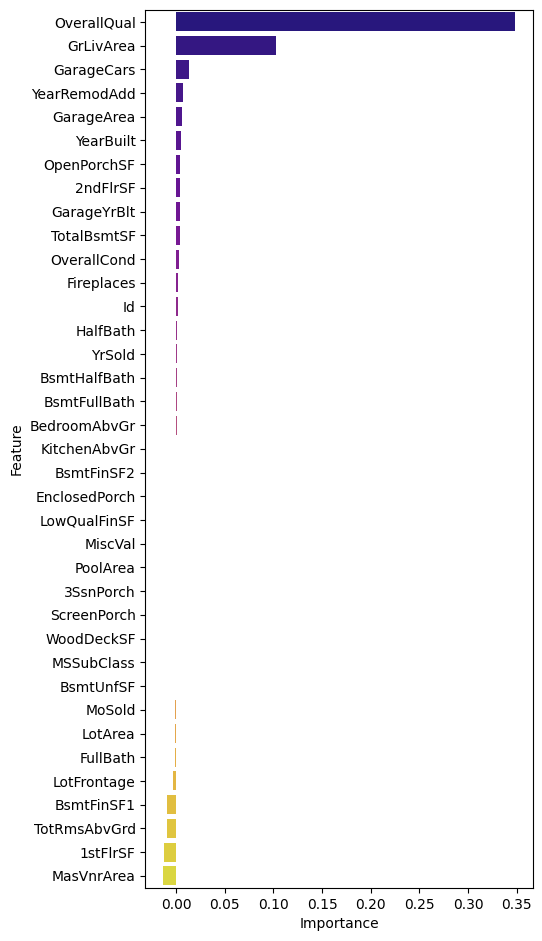

In [95]:
numeric_columns = X.select_dtypes(exclude=['object']).columns

numeric_importance_df = importance_df[importance_df['Feature'].isin(numeric_columns)]
numeric_importance_df = numeric_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 0.3*len(num_variables)))
sns.barplot(data=numeric_importance_df, x='Importance', y='Feature', palette = "plasma")

<Axes: xlabel='Consolidated_Importance', ylabel='Feature'>

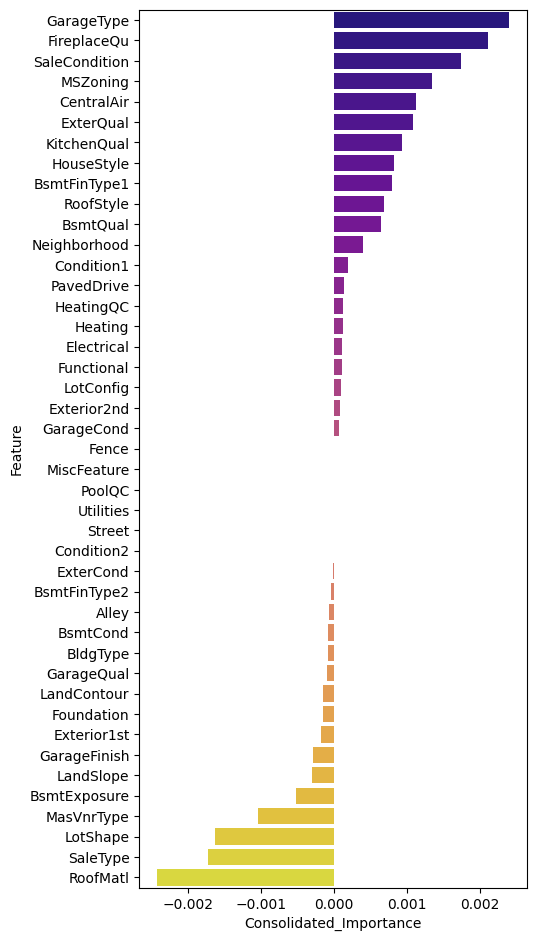

In [96]:
original_categorical_features = X.select_dtypes(include=['object']).columns

consolidated_importances_Cat_var = {}

for original_feature in original_categorical_features:
    one_hot_columns = [col for col in importance_df['Feature'] if original_feature in col]
    consolidated_importance = importance_df.loc[importance_df['Feature'].isin(one_hot_columns), 'Importance'].sum()
    consolidated_importances_Cat_var[original_feature] = consolidated_importance


consolidated_importance_df_cat_var = pd.DataFrame(list(consolidated_importances_Cat_var.items()), columns=['Feature', 'Consolidated_Importance'])


consolidated_importance_df_cat_var = consolidated_importance_df_cat_var.sort_values(by='Consolidated_Importance', ascending=False)

consolidated_importance_df_cat_var


plt.figure(figsize=(5, 0.3*len(num_variables)))
sns.barplot(data=consolidated_importance_df_cat_var, x='Consolidated_Importance', y='Feature', palette = "plasma")


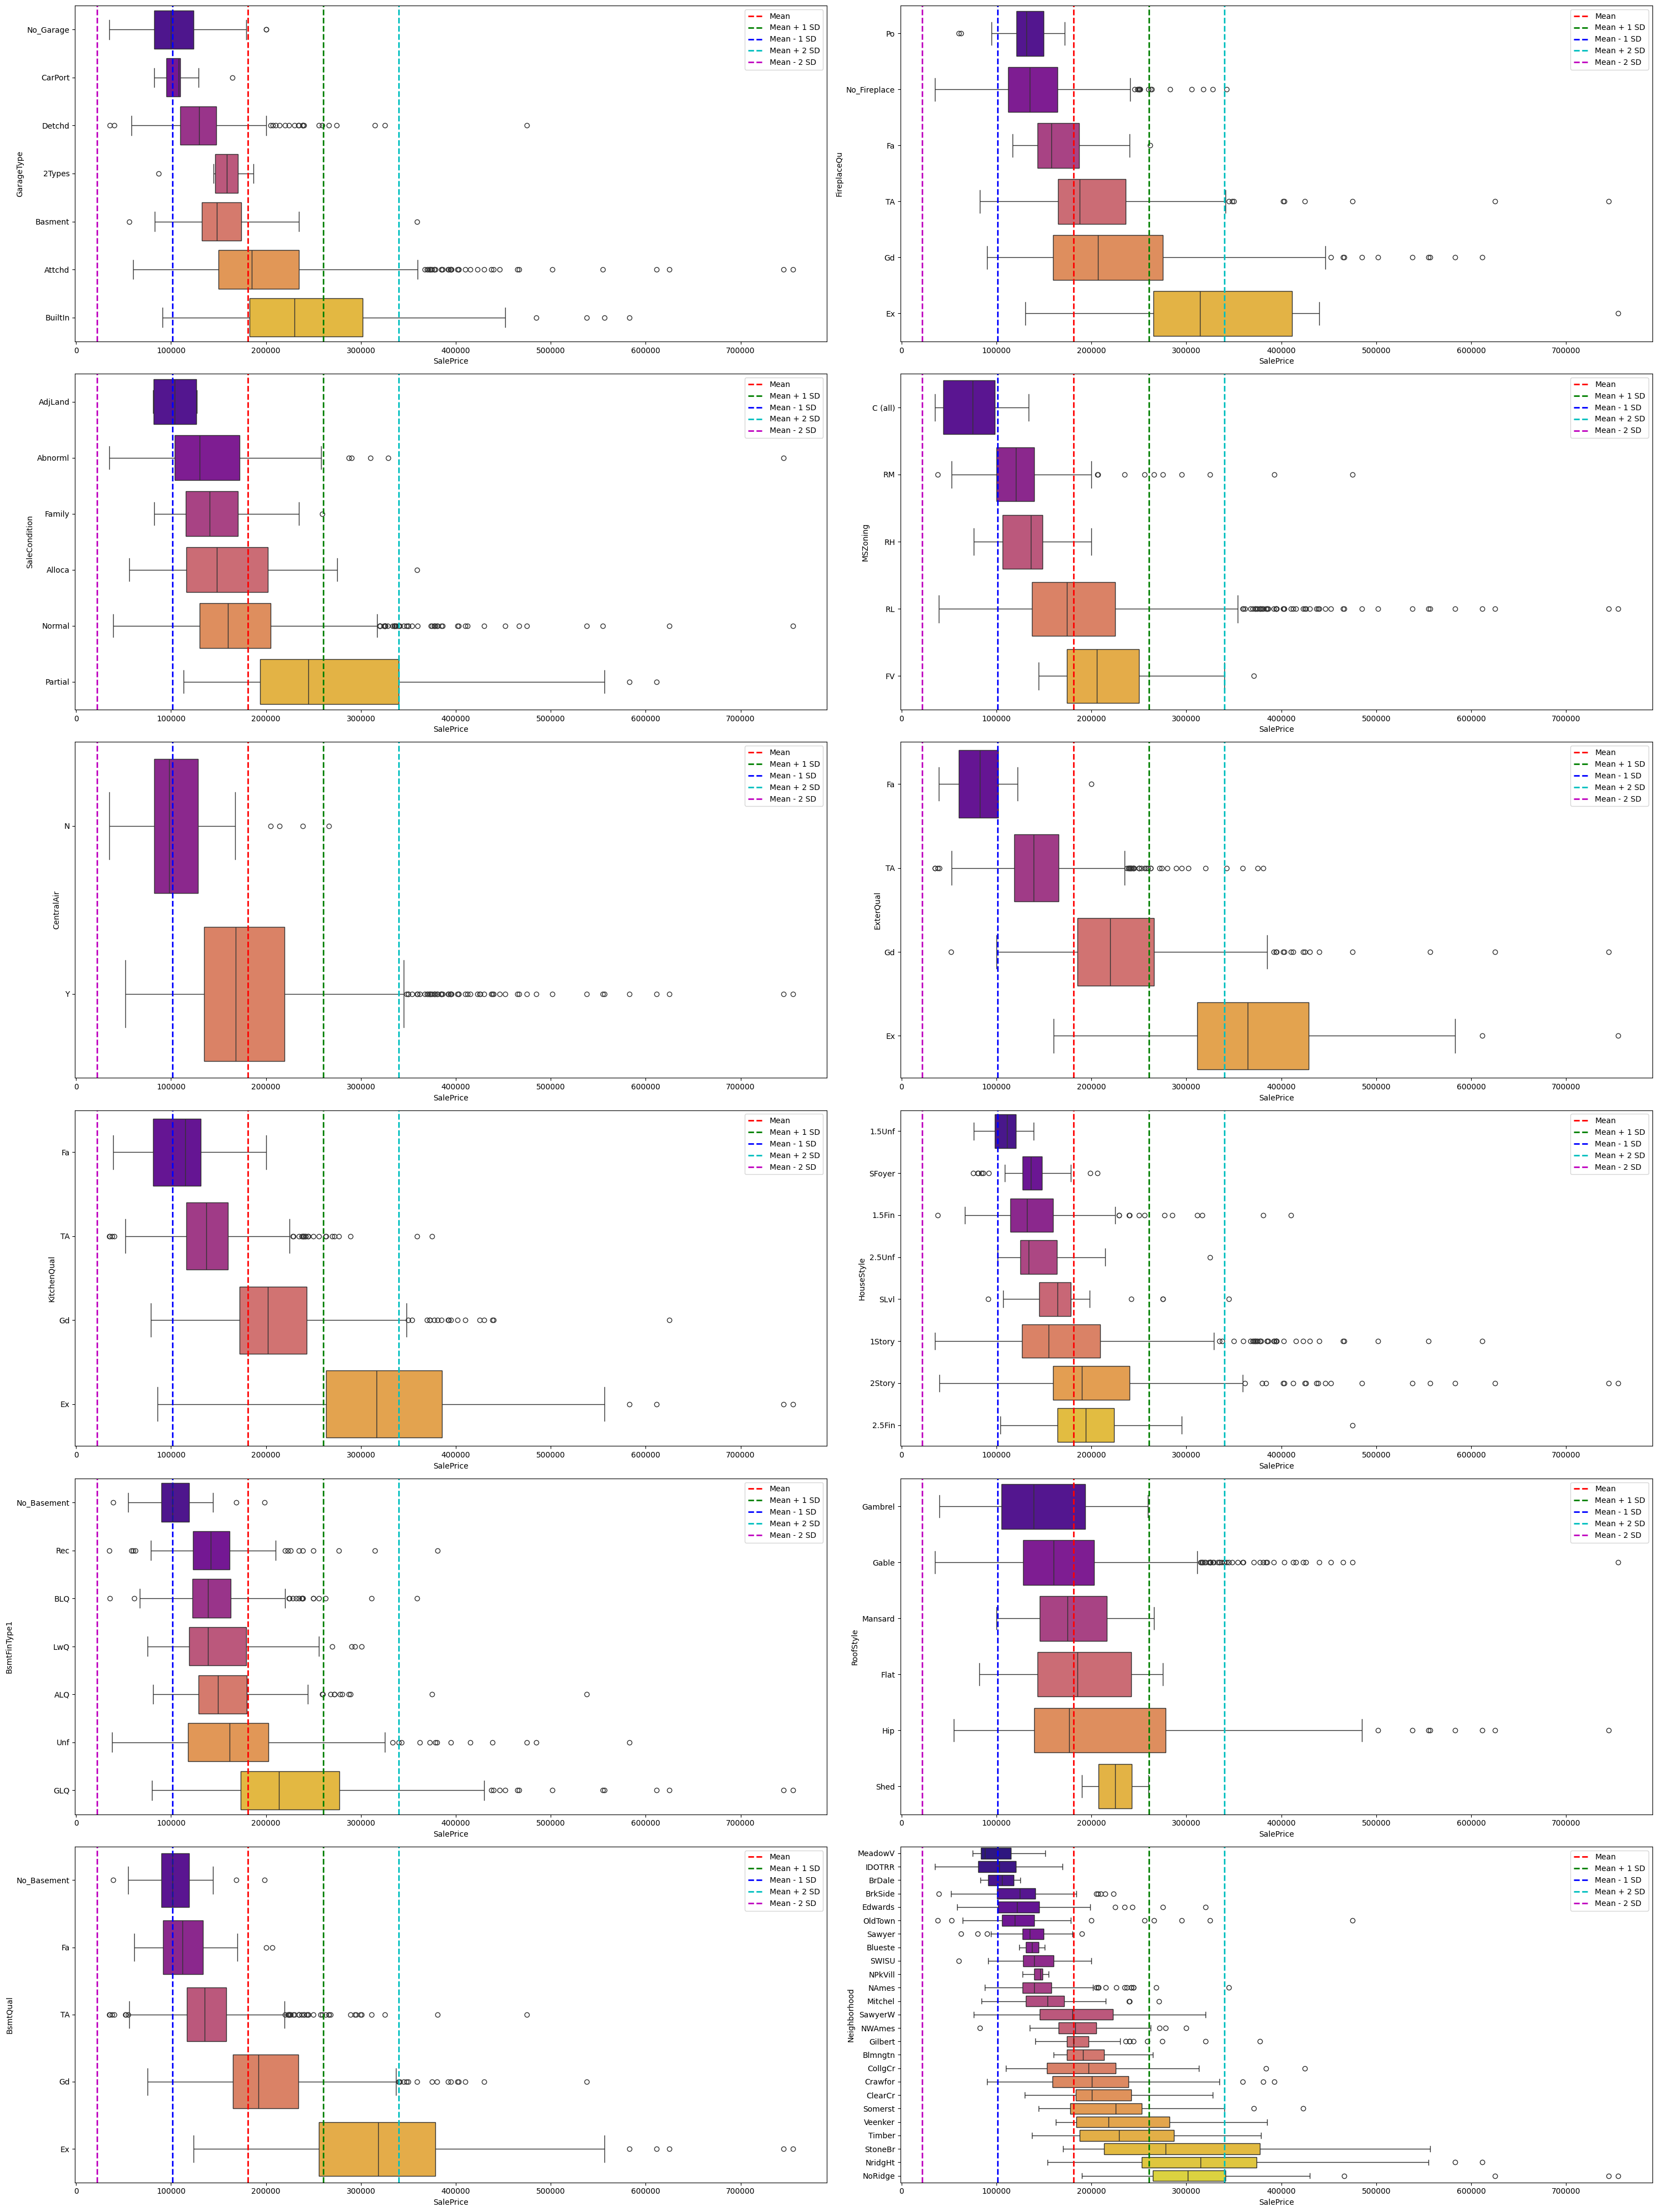

In [97]:
important_cat_variables = ['GarageType', 'FireplaceQu', 'SaleCondition', 'MSZoning', 'CentralAir', 'ExterQual', 'KitchenQual', 'HouseStyle', 'BsmtFinType1', 'RoofStyle', 'BsmtQual', 'Neighborhood']

num_rows = 6
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))

axes = axes.ravel()
ames_copy = train_data.copy(deep=True)

for i, c in enumerate(important_cat_variables):
    group_means = train_data.groupby(c)['SalePrice'].mean().sort_values()
    ames_copy[c] = ames_copy[c].astype(pd.CategoricalDtype(categories=group_means.index, ordered=True))
    sns.boxplot(data=train_data, x='SalePrice', y=c, palette='plasma', order=group_means.index, ax=axes[i])
    

    mean_value = train_data['SalePrice'].mean()
    std_value = train_data['SalePrice'].std()


    axes[i].axvline(mean_value, color='r', linestyle='--', linewidth=2, label='Mean')
    axes[i].axvline(mean_value + std_value, color='g', linestyle='--', linewidth=2, label='Mean + 1 SD')
    axes[i].axvline(mean_value - std_value, color='b', linestyle='--', linewidth=2, label='Mean - 1 SD')
    axes[i].axvline(mean_value + 2 * std_value, color='c', linestyle='--', linewidth=2, label='Mean + 2 SD')
    axes[i].axvline(mean_value - 2 * std_value, color='m', linestyle='--', linewidth=2, label='Mean - 2 SD')
    axes[i].legend()

for i in range(len(important_cat_variables), num_rows * num_cols):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()